60201359 이주영 4주차 과제

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("data/student.csv")

print(df.shape)
df.head()

(400, 7)


,gre,gpa,rank,sex,age,nationality,admission
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [3]:
#결측치 확인
df.isnull().sum()

gre            2
gpa            2
rank           0
sex            0
age            0
nationality    0
admission      2
dtype: int64

In [4]:
#gre, gpa 결측값은 평균으로 대체하고, admission 결측값은 삭제
df.gre.fillna(df['gre'].mean(), inplace=True)
df.gpa.fillna(df['gpa'].mean(), inplace=True)
df.dropna(subset=['admission'], inplace=True)

In [5]:
df.isnull().sum()

gre            0
gpa            0
rank           0
sex            0
age            0
nationality    0
admission      0
dtype: int64

In [6]:
#전처리
#국가는 결과에 큰 영향을 주지 않는다고 생각해서 지움
#남1 여2, 합격1 불합격0으로 처리
df=df.drop(['nationality'],axis=1)
df["sex"]=df.sex.map({"m":1, "f":0})
df["admission"]=df.admission.map({"합격":1, "불합격":0})
df

,gre,gpa,rank,sex,age,admission
0,380.000000,3.610000,3,0,19,0
2,800.000000,4.000000,1,1,19,1
3,587.889447,3.190000,4,1,19,1
4,520.000000,2.930000,4,0,19,0
5,760.000000,3.000000,2,0,19,1
...,...,...,...,...,...,...
395,620.000000,4.000000,2,0,20,0
396,560.000000,3.040000,3,1,18,0
397,460.000000,2.630000,2,1,19,0
398,700.000000,3.389497,2,1,19,0


In [18]:
#gre 소수점 버림, gpa 소수점 둘째자리에서 반올림
df['gre'] = df['gre'].apply(np.floor)
df['gpa']= round(df['gpa'], 2)
df

,gre,gpa,rank,sex,age,admission
0,380.0,3.61,3,0,19,0
2,800.0,4.00,1,1,19,1
3,587.0,3.19,4,1,19,1
4,520.0,2.93,4,0,19,0
5,760.0,3.00,2,0,19,1
...,...,...,...,...,...,...
395,620.0,4.00,2,0,20,0
396,560.0,3.04,3,1,18,0
397,460.0,2.63,2,1,19,0
398,700.0,3.39,2,1,19,0


In [22]:
#X, y로 데이터 분리
X = np.array(df.iloc[:,:-1])
y = np.array(df.admission)
X

array([[380.  ,   3.61,   3.  ,   0.  ,  19.  ],
       [800.  ,   4.  ,   1.  ,   1.  ,  19.  ],
       [587.  ,   3.19,   4.  ,   1.  ,  19.  ],
       ...,
       [460.  ,   2.63,   2.  ,   1.  ,  19.  ],
       [700.  ,   3.39,   2.  ,   1.  ,  19.  ],
       [600.  ,   3.89,   3.  ,   1.  ,  19.  ]])

In [23]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)

X_train 크기: (278, 5)
y_train 크기: (278,)
X_test 크기: (120, 5)
y_test 크기: (120,)


In [25]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0) #max미지정
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [26]:
#모델성능평가
temp_y_pred = tree.predict(X_test)
#training 값을 X_test에서 넣음
print('예측값\n', temp_y_pred)
print('실제값\n', y_test)

예측값
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 1 0 0 0 1 1 0 0]
실제값
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 1 1 0 0]


In [27]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(y_test, temp_y_pred)
#y_test와 temp_y_pred로 예측한 값을 적용하여 temp_acc를 추출함

print('정확도: ', format(temp_acc))

정확도:  0.6916666666666667


In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('accuracy :', accuracy_score(y_test, temp_y_pred))
print('precision :', precision_score(y_test, temp_y_pred))
print('recall :', recall_score(y_test, temp_y_pred))
print('f1 :', f1_score(y_test, temp_y_pred))

accuracy : 0.6916666666666667
precision : 0.43333333333333335
recall : 0.3939393939393939
f1 : 0.4126984126984127


In [29]:
#과적합과 가지치기
train_scores, test_scores = list(), list()
#train_score와 test_score의 정확도 저장 장소
#train_score는 훈련데이터에 특화될수록 증가
#test_score는 테스트데이터에 일반화될수록 증가

In [30]:
#의사결정나무 모델의 깊이 조절(1~19)
for i in range(1,20):
    DT1=DecisionTreeClassifier(max_depth=i)
    #깊이를 증가시키면서 ~나무 모델 적합
    DT1.fit(X_train, y_train)
    
    #traing dataset 정확도 평가
    train_att= DT1.predict(X_train)
    train_acc= accuracy_score(y_train, train_att)
    train_scores.append(train_acc)
    
    #test dataset 정확도 평가
    test_att= DT1.predict(X_test)
    test_acc= accuracy_score(y_test, test_att)
    test_scores.append(test_acc)
    
    #train 정확도와 test 정확도를 depth개수에 따른 정확도 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.665, test: 0.725
>2, train: 0.705, test: 0.767
>3, train: 0.741, test: 0.683
>4, train: 0.766, test: 0.717
>5, train: 0.781, test: 0.742
>6, train: 0.802, test: 0.742
>7, train: 0.849, test: 0.750
>8, train: 0.878, test: 0.725
>9, train: 0.924, test: 0.733
>10, train: 0.946, test: 0.742
>11, train: 0.968, test: 0.733
>12, train: 0.978, test: 0.725
>13, train: 0.982, test: 0.708
>14, train: 0.989, test: 0.708
>15, train: 0.993, test: 0.675
>16, train: 0.993, test: 0.683
>17, train: 0.993, test: 0.692
>18, train: 0.993, test: 0.700
>19, train: 0.993, test: 0.692


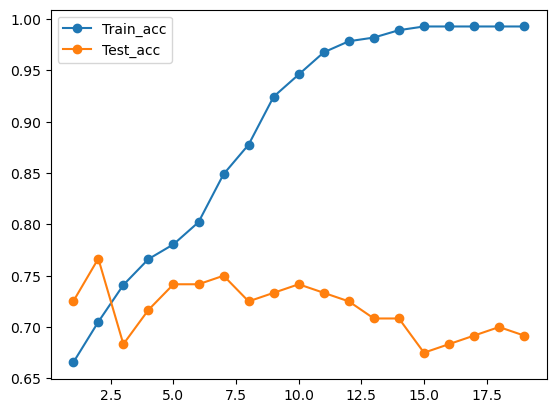

In [31]:
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label= 'Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label= 'Test_acc')
pyplot.legend()
pyplot.show()

#최적의 ~나무 깊이는 5 (주황색 제일 높은 지점)

In [37]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5)
tree.fit(X_train, y_train)
#새로운 최적깊이 값(5) 부여

DecisionTreeClassifier(max_depth=5, random_state=0)

In [38]:
#트리시각화
import graphviz
from sklearn.tree import export_graphviz

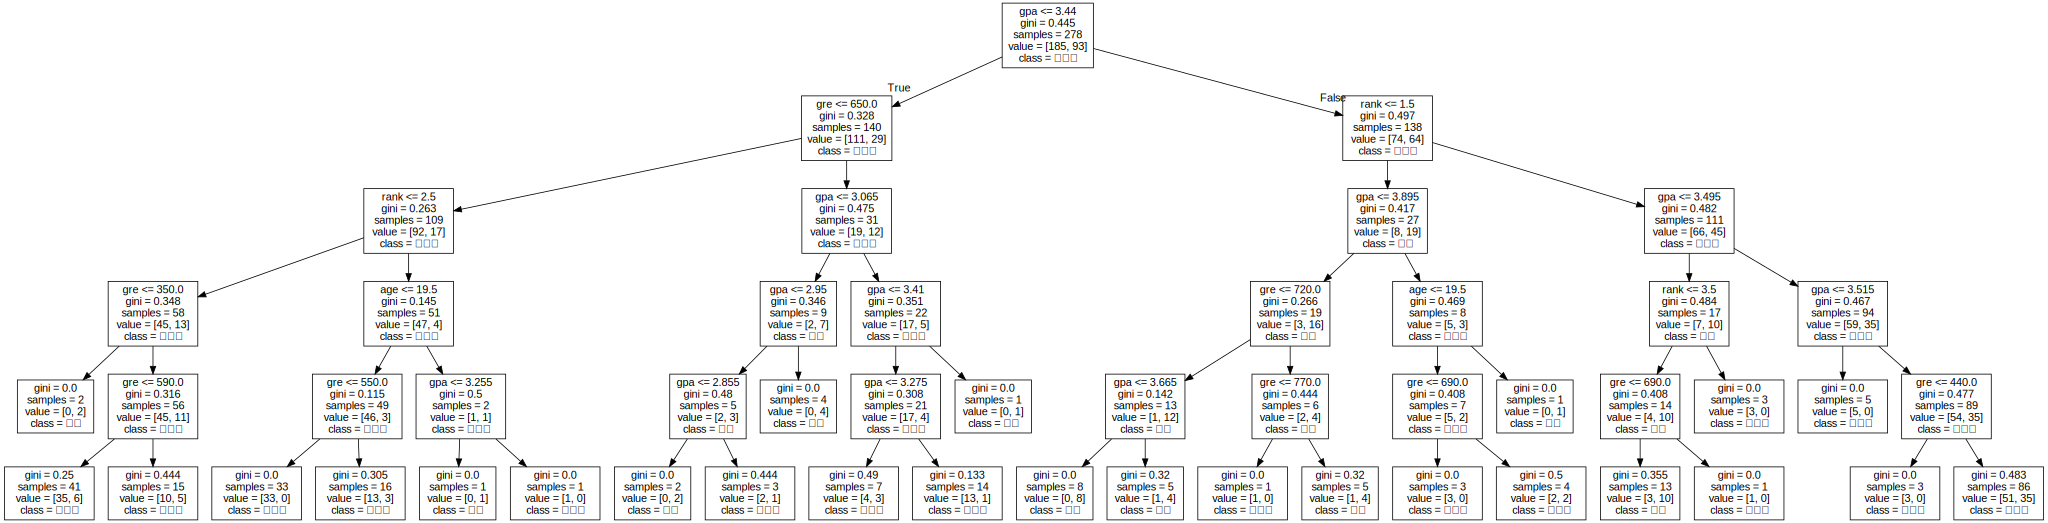

In [39]:
feature_name=['gre','gpa','rank','sex','age']
tree_graph=export_graphviz(tree, feature_names=feature_name, class_names=["불합격", "합격"])
graphviz.Source(tree_graph)

In [40]:
dot=graphviz.Source(tree_graph)
dot.format = 'gif'
dot.render(filename='student_tree', directory="tree", cleanup=True)

'tree\\student_tree.gif'

In [41]:
print('정확도: ', format(temp_acc))

정확도:  0.6916666666666667


후기

이번 실습은 시각화를 활용한 부분이 많아 보기에도 좋고 과정을 더 잘 이해할 수 있었다. 불합격과 합격이 약 150개 정도 차이나서 오버샘플링을 하고 싶었는데 오류가 나 하지 못 한 게 아쉽고, SMOTE와 EDA에 대해 더 공부해야겠다고 생각했다. 정확도는 69%로 가지치기 전과 후의 정확도가 같게 나와 초기에 전처리의 영향이 큰 것 같다고 생각된다.